# CREATING GRAPHICS

In [20]:
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import pandas as pd

In [21]:
%matplotlib inline
plt.style.use("fivethirtyeight")

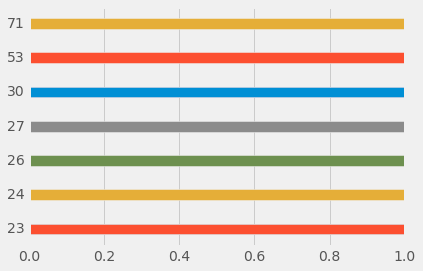

In [22]:
# veri1 = [her, satranç, olan, karşı, yavaş, aynı, beni, kendi, oyun]


veri = [["her", "71", "male"], ["satranç", "53", "male"], ["olan", "30", "male"], ["karşı", "30", "male"], ["yavaş", "27", "male"], ["aynı", "26", "male"], ["beni", "24", "male"], ["kendi", "23", "female"], ["oyun", "23", "male"]]
veri.reverse()

for x,y,z in veri :
    plt.hist(y, bins=3, rwidth=0.95, label=["men"], orientation="horizontal")
    def insert_data_labels(bars):
        for bar in bars:
            bar_yazısı = x

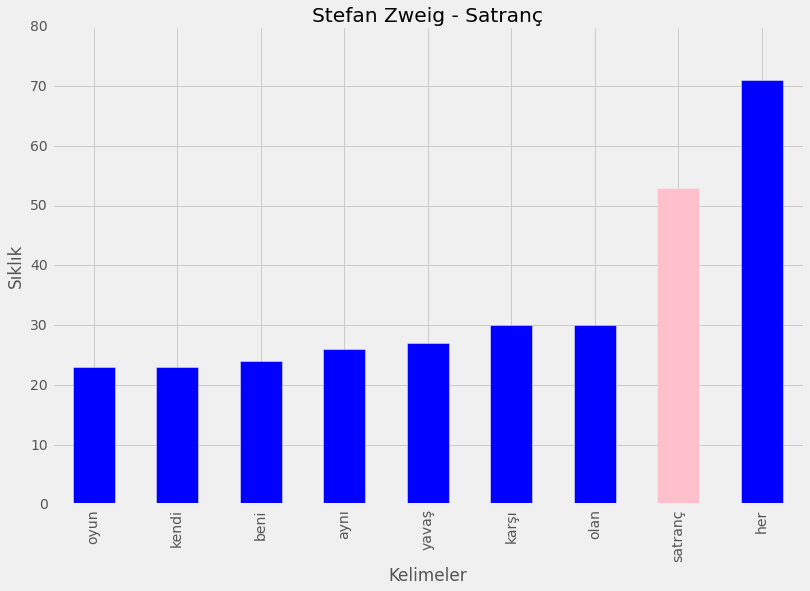

<Figure size 432x288 with 0 Axes>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


sıklık = [23, 23, 24, 26, 27, 30, 30, 53, 71]

kelime_sıklığı = pd.Series(sıklık)

kelime_grubu = [
    "oyun",
    "kendi",
    "beni",
    "aynı",
    "yavaş",
    "karşı",
    "olan",
    "satranç",
    "her"
]

renkler = ["b","b","b","b","b","b","b","pink","b"]

plt.figure(figsize=(12, 8))
ax = kelime_sıklığı.plot(kind="bar", color=renkler)
ax.set_title("Stefan Zweig - Satranç")
ax.set_xlabel("Kelimeler")
ax.set_ylabel("Sıklık")
ax.set_xticklabels(kelime_grubu)

rects = ax.patches

plt.show()
plt.savefig("[Icerik_Gorsellestirme_4].png")

------------------------------------------------------------------------------------------------------

# WORD CLOUD

In [8]:
import ebooklib
from ebooklib import epub 
import ebooklib
import bs4
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import turtle 
import requests
from collections import Counter
import json
import wikipedia
import matplotlib.pyplot as plt
import pandas as pd

------------------------------------------------------------------------------------------------------

# Aşama 1 - Verileştirme Başlangıcı

In [10]:
kitap = epub.read_epub("(Stefan Zweig - Satranc).epub")

bolumler = []

for item in kitap.get_items():
  if (item.get_type() == ebooklib.ITEM_DOCUMENT): 
    bolumler.append(item.get_content())

duz_metin = ""
for bolum in bolumler:
  bs = BeautifulSoup(bolum, "html.parser")
  icerikler = bs.find_all(text = True)
  for icerik in icerikler:
    duz_metin = duz_metin + icerik

duz_metin = duz_metin.lower()
silinecek_ifadeler = ["xml version='1.0' encoding='utf-8'?","html","\"","'",""," ve "," ile "," ne "," sanki "," sonra "," çünkü "," da "," de "," bir "," iki "," üç "," ama "," o "," ki "," bu "," için "," gibi "," böyle "," ya "," daha ", " çok "," bile ","bu "," diye ","ki "," bana "," hiç "," yalnızca "," en "," ona "," olarak "," bütün ", "hiç "," kadar ","için "," ki"," şey ","gibi "," sonra "," için"," dr "," b "," ancak "]
for ifade in silinecek_ifadeler:
  duz_metin = duz_metin.replace(ifade,"")

dosya = open("[Icerik_Kitap].txt", "w", encoding="utf-8")
dosya.writelines(duz_metin)
dosya.close()

------------------------------------------------------------------------------------------------------

# Aşama 2 - Kitaptan Metin Bulutu

In [11]:
maske1 = Image.open("(Pawn).jpg")

maske_veri_1 = np.array(maske1)

mb = WordCloud(width=2000, height=2000, mask=maske_veri_1).generate(duz_metin)
mb.to_file("[Icerik_Gorsellestirme_1].jpg")

------------------------------------------------------------------------------------------------------

# Aşama 3 - Turtle İle Çizelge Çizimi

In [12]:
kelimeler = duz_metin.split(" ")
kelime_ve_adetleri = Counter(kelimeler)

k = turtle.Turtle()
miktar = 50

for kelime in kelime_ve_adetleri.most_common(11):
  gelen = requests.get("https://gender-api.com/get?name="+kelime[0]+"&key=R4F7uw6tN8bV3TzKBtrp79apnwHHh3LlwEJg")
  veri = json.loads(gelen.content)
  if (veri["accuracy"]>50):
    print(kelime[0]+" - "+str(kelime[1])+" - "+veri["gender"])
    kenar = kelime[1]*3
    k.begin_fill()
    if (veri["gender"] == "male"):
      k.color("blue")    
    else:
      k.color("red")
    k.write(kelime[0])
    for a in range(0,2):
      k.forward(20)
      k.right(90)
      k.forward(kenar)
      k.right(90)     
    k.end_fill()
    k.goto(miktar,0) 
    cikti = k.getscreen()
    cikti.getcanvas().postscript(file="[Icerik_Gorsellestirme_3].eps")
    miktar = miktar + 50

her - 71 - male
satranç - 53 - male
olan - 30 - male
karşı - 30 - male
yavaş - 27 - male
aynı - 26 - male
beni - 24 - male
kendi - 23 - female
oyun - 23 - male


------------------------------------------------------------------------------------------------------

# Aşama 4 - Wikipedia Metin Bulutu

In [13]:
maske2 = Image.open("(King).jpg")

maske_veri_2 = np.array(maske2)

wikipedia.set_lang("tr")
sonuclar = wikipedia.search("Stefan Zweig")

wikipedia_metin = ""

for sonuc in sonuclar :
  sayfa = wikipedia.page(sonuc)
  icerik = sayfa.content
  wikipedia_metin = wikipedia_metin + icerik

wikipedia_metin = wikipedia_metin.lower()
silinecek_ifadeler_2 = ["xml version='1.0' encoding='utf-8'?","html","\"","'",""," ve "," ile "," ne "," sanki "," sonra "," çünkü "," da "," de "," bir "," iki "," üç "," ama "," o "," ki "," bu "," için "," gibi "," böyle "," ya "," daha ", " çok "," bile ","bu "," diye ","ki "," bana "," hiç "," yalnızca "," en "," ona "," olarak "," bütün ", "hiç "," kadar ","için "," ki"," şey ","gibi "," sonra "," için"," dr "," b "," ancak "]
for ifade in silinecek_ifadeler_2:
  wikipedia_metin = wikipedia_metin.replace(ifade,"")

dosya2 = open("[Icerik_Wikipedia].txt", "w", encoding="utf-8")
dosya2.writelines(wikipedia_metin)
dosya2.close()

mb = WordCloud(width=2000, height=2000, mask=maske_veri_2).generate(wikipedia_metin)
mb.to_file("[Icerik_Gorsellestirme_2].jpg")

------------------------------------------------------------------------------------------------------

# Aşama 5 - Karakter

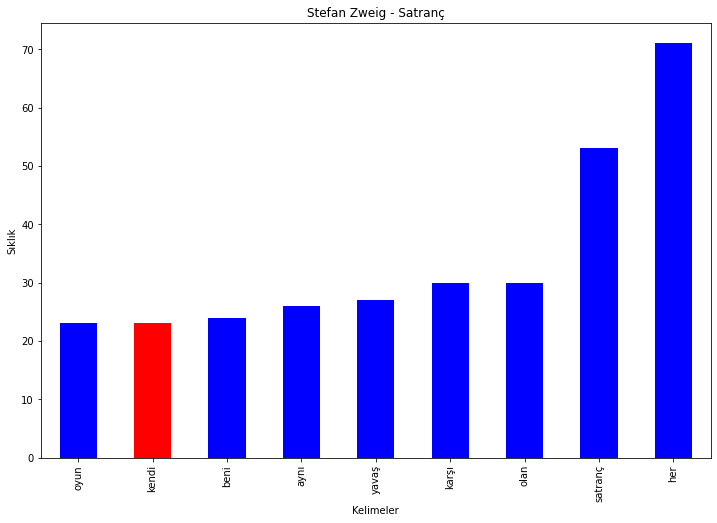

In [15]:
file = open("[Icerik_Cikti].csv", "w", encoding="utf-8")
file.write("Kelime,Sayi,Cins,\n")

kelimeler = duz_metin.split(" ")
kelime_ve_adetleri = Counter(kelimeler)

for kelime in kelime_ve_adetleri.most_common(11):
  gelen = requests.get("https://gender-api.com/get?name="+kelime[0]+"&key=R4F7uw6tN8bV3TzKBtrp79apnwHHh3LlwEJg")
  veri = json.loads(gelen.content)
  if (veri["accuracy"]>50):
    file.write(kelime[0]+","+str(kelime[1])+","+veri["gender"]+",\n")

file.close()


sıklık = [23, 23, 24, 26, 27, 30, 30, 53, 71]

kelime_sıklığı = pd.Series(sıklık)

kelime_grubu = ["oyun","kendi","beni","aynı","yavaş","karşı","olan","satranç","her"]

renkler = ["b","r","b","b","b","b","b","b","b"]

plt.figure(figsize=(12, 8))
ax = kelime_sıklığı.plot(kind="bar", color=renkler)
ax.set_title("Stefan Zweig - Satranç")
ax.set_xlabel("Kelimeler")
ax.set_ylabel("Sıklık")
ax.set_xticklabels(kelime_grubu)

rects = ax.patches

plt.savefig("[Icerik_Gorsellestirme_4].png", dpi=150)
plt.show()